In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('RSNA_breast_cancer_data.csv')
df.head()

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,implant,machine_id,difficult_negative_case,image_path
0,1,1014,629904228,L,MLO,76.0,0,0,0,0,49,False,IMG\629904228.dcm
1,1,1014,669597068,L,CC,76.0,0,0,0,0,49,False,IMG\669597068.dcm
2,1,1014,229558076,R,MLO,76.0,0,0,0,0,49,False,IMG\229558076.dcm
3,1,1014,1173679750,R,CC,76.0,0,0,0,0,49,False,IMG\1173679750.dcm
4,1,10208,638273415,L,MLO,56.0,0,0,0,0,49,True,IMG\638273415.dcm


In [7]:
import os
import pydicom
import numpy as np
from PIL import Image

def load_dicom_image(path):
    dicom_image = pydicom.dcmread(path)
    img_array = dicom_image.pixel_array
    img = Image.fromarray(img_array)
    # img = img.convert('L')  # Convert to grayscale if needed
    return img

In [8]:
# Example: Load an image using its path
sample_path = df.iloc[0]['image_path']
img = load_dicom_image(sample_path)
img.show()

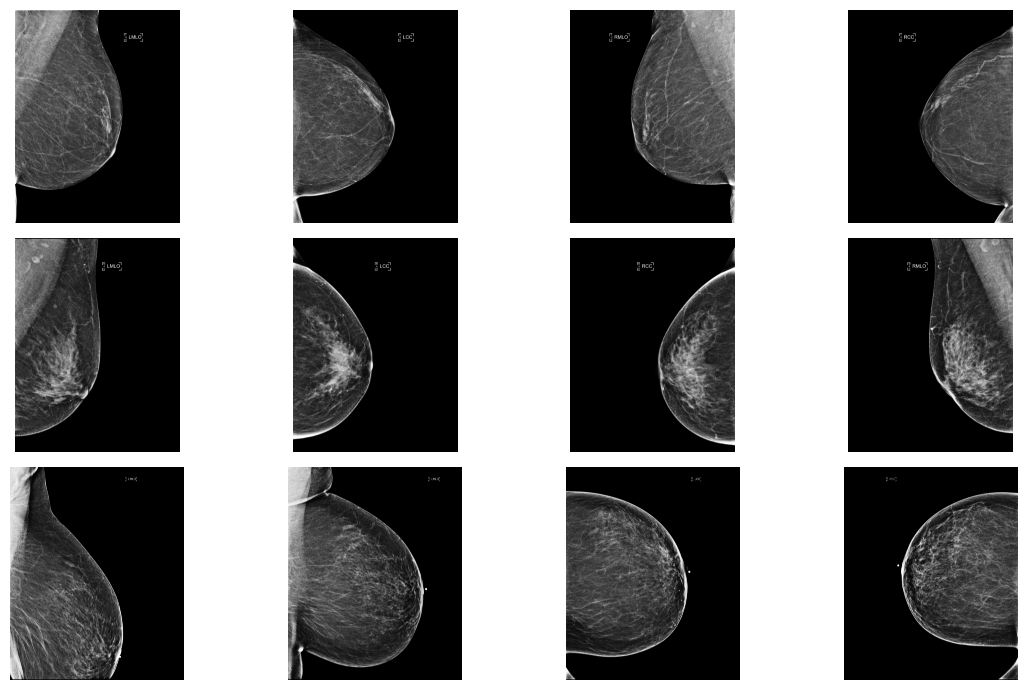

In [18]:
import pydicom
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Function to load a DICOM image
def load_dicom_image(path):
    dicom_image = pydicom.dcmread(path)
    img_array = dicom_image.pixel_array
    
    # If the pixel array is more than 2D (e.g., RGB image), convert to grayscale
    if len(img_array.shape) == 3:
        img_array = img_array.mean(axis=-1)  # Convert RGB to grayscale
    
    # Normalize pixel values to the range [0, 255]
    img_array = (img_array - np.min(img_array)) / (np.max(img_array) - np.min(img_array)) * 255
    img_array = img_array.astype(np.uint8)
    
    # Convert to a PIL Image
    img = Image.fromarray(img_array)
    return img

# Create a 3x4 grid to display the first 12 images
fig, axes = plt.subplots(3, 4, figsize=(12, 7))

# Loop through the first 12 images in the dataset
for i in range(12):
    sample_path = df.iloc[i]['image_path']  # Path to the DICOM image
    img = load_dicom_image(sample_path)     # Load the DICOM image

    # Get the current axis in the grid
    ax = axes[i // 4, i % 4]  # Adjusted for 3 rows and 4 columns
    
    # Display the image in the grid
    ax.imshow(img, cmap='gray')
    ax.axis('off')  # Hide the axes

# Adjust layout and display the grid
plt.tight_layout()
plt.show()

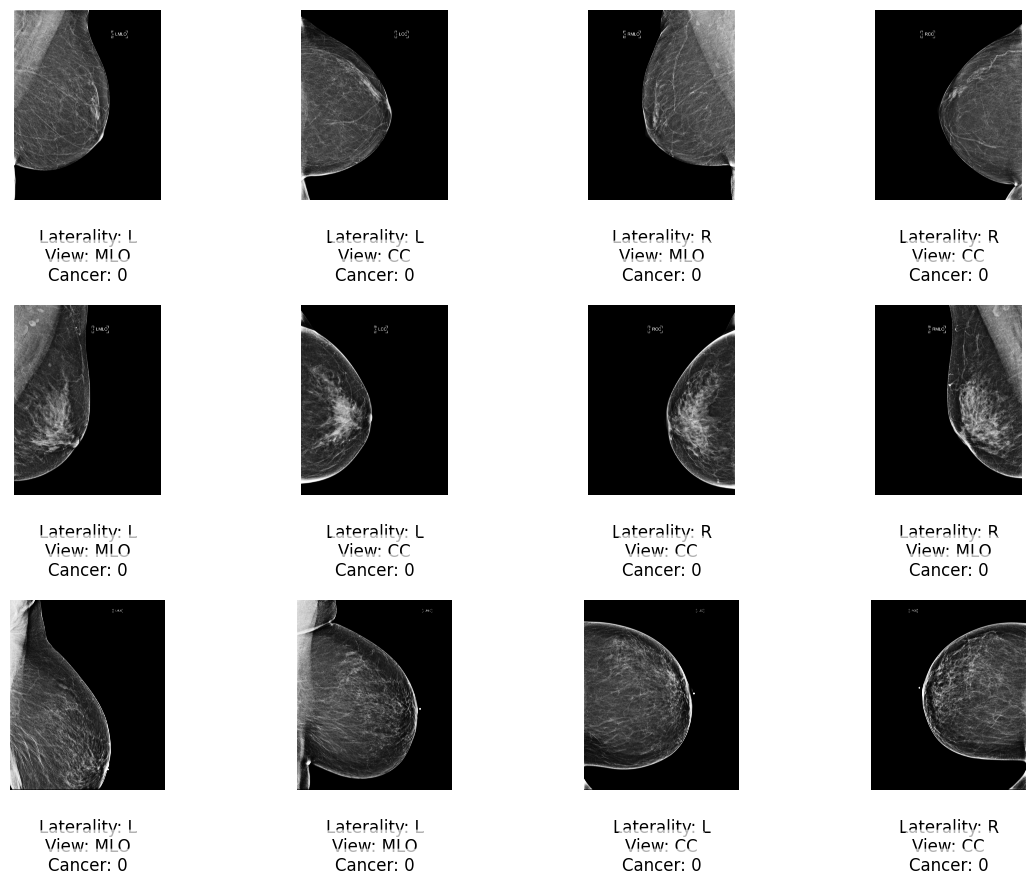

In [25]:
import pydicom
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Function to load a DICOM image
def load_dicom_image(path):
    dicom_image = pydicom.dcmread(path)
    img_array = dicom_image.pixel_array
    
    # If the pixel array is more than 2D (e.g., RGB image), convert to grayscale
    if len(img_array.shape) == 3:
        img_array = img_array.mean(axis=-1)  # Convert RGB to grayscale
    
    # Normalize pixel values to the range [0, 255]
    img_array = (img_array - np.min(img_array)) / (np.max(img_array) - np.min(img_array)) * 255
    img_array = img_array.astype(np.uint8)
    
    # Convert to a PIL Image
    img = Image.fromarray(img_array)
    return img

# Create a 3x4 grid to display the first 12 images
fig, axes = plt.subplots(3, 4, figsize=(12, 9))

# Loop through the first 12 images in the dataset
for i in range(12):
    sample_path = df.iloc[i]['image_path']  # Path to the DICOM image
    img = load_dicom_image(sample_path)     # Load the DICOM image
    
    # Get corresponding values for laterality, view, and cancer
    laterality = df.iloc[i]['laterality']
    view = df.iloc[i]['view']
    cancer = df.iloc[i]['cancer']

    # Get the current axis in the grid
    ax = axes[i // 4, i % 4]  # Adjusted for 3 rows and 4 columns
    
    # Display the image in the grid
    ax.imshow(img, cmap='gray')
    ax.axis('off')  # Hide the axes
    
    # Add the text annotations for laterality, view, and cancer
    ax.text(0.5, -0.15, f"Laterality: {laterality}", ha='center', va='top', transform=ax.transAxes, fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5'))
    ax.text(0.5, -0.25, f"View: {view}", ha='center', va='top', transform=ax.transAxes, fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5'))
    ax.text(0.5, -0.35, f"Cancer: {cancer}", ha='center', va='top', transform=ax.transAxes, fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5'))

# Adjust layout and display the grid
plt.tight_layout()
plt.show()

In [ ]:
# i got this code from kaggle to convert and resize dcm to png

import pydicom
import numpy as np
import cv2
import os
from joblib import Parallel, delayed
from tqdm.notebook import tqdm
from pathlib import Path

RESIZE_TO = (512, 512)

!rm -rf train_images_processed_cv2_{RESIZE_TO[0]}
!mkdir train_images_processed_cv2_{RESIZE_TO[0]}

# https://www.kaggle.com/code/tanlikesmath/brain-tumor-radiogenomic-classification-eda/notebook
def dicom_file_to_ary(path):
    dicom = pydicom.dcmread(path)
    data = dicom.pixel_array
       
    data = (data - data.min()) / (data.max() - data.min())
    
    if dicom.PhotometricInterpretation == "MONOCHROME1":
        data = 1 - data
        
    data = cv2.resize(data, RESIZE_TO)
    data = (data * 255).astype(np.uint8)
    return data

directories = list(Path('train_images').iterdir())

def process_directory(directory_path):
    parent_directory = str(directory_path).split('/')[-1]
    !mkdir -p train_images_processed_cv2_{RESIZE_TO[0]}/{parent_directory}
    for image_path in directory_path.iterdir():
        processed_ary = dicom_file_to_ary(image_path)
        
        cv2.imwrite(
            f'train_images_processed_cv2_{RESIZE_TO[0]}/{parent_directory}/{image_path.stem}.png',
            processed_ary
        )
        
import multiprocessing as mp

with mp.Pool(64) as p:
    p.map(process_directory, directories)

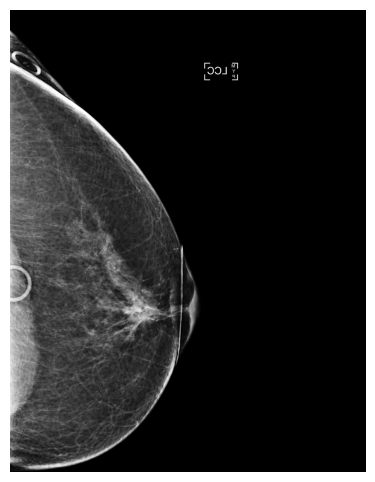

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pydicom

# Function to load and process DICOM image
def load_dicom_image(path):
    dicom_image = pydicom.dcmread(path)
    img_array = dicom_image.pixel_array
    
    # Check the rightmost pixels to see if they're black (near 0 intensity)
    rightmost_pixels = img_array[:, -10:]  # Check the last 10 pixels (right edge)
    
    # If the rightmost pixels are not black (intensity not close to 0), flip the image
    if np.any(rightmost_pixels > 10):  # Threshold to allow some small variance in pixel intensity
        img_array = np.flip(img_array, axis=1)  # Flip horizontally (left to right)
    
    img = Image.fromarray(img_array)
    return img

# Example: Displaying a single DICOM image
fig, ax = plt.subplots(figsize=(6, 6))

# Load the image and align it if needed
sample_path = '1863446.dcm'  # Replace with actual path
img = load_dicom_image(sample_path)

# Display the image
ax.imshow(img, cmap='gray')
ax.axis('off')  # Hide axes

# Adjust layout if necessary
plt.subplots_adjust(right=1.0)  # Adjust the right margin to ensure alignment
plt.show()
